In [15]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
#%matplotlib inline
%matplotlib notebook
import os
import h5py

#from keras.utils.io_utils import HDF5Matrix
from noggin import create_plot


import torch
from torch import nn
import torch.nn.functional as F

In [107]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [108]:
batch_size = 10

In [109]:
base_path = r"C:\Users\khoui\Nutrient_Detection\Data101Food"

train_path = os.path.join(base_path, 'food_c101_n10099_r64x64x3.h5')
test_path = os.path.join(base_path, 'food_test_c101_n1000_r64x64x3.h5')

In [110]:
f2 = h5py.File(train_path, 'r')
f3 = h5py.File(test_path, "r")

#train_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training"
#test_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\validation"
#train_files = []
#train_files = [f for f in os.listdir(base_path) if os.path.isfile(os.path.join(train_path, f))]
#test_files = [f for f in os.listdir(test_path) if os.path.isfile(os.path.join(test_dir, f))]

In [111]:
#x_train = []
#for file in train_files:
    #x_train.append(file)

In [112]:
f2.keys()





<KeysViewHDF5 ['category', 'category_names', 'images']>

In [98]:
labels = f2["category"]
label_names = f2['category_names']
x_train = f2['images']
#these are Dataset objects

test_labels = f3["category"]
test_label_names = f3['category_names']
test_x_train = f3['images']

label_names_data = label_names[:]
labels_data = labels[:]
x_train = x_train[:]

test_label_names_data = label_names[:]
test_labels_data = labels[:]
test_x_train = x_train[:]

#there are 10099 pictures 
#change labels_data to

#labels_data[0]

In [99]:
x_train = np.array(x_train.transpose(0, 3, 1, 2))
x_train.shape

x_test = np.array(test_x_train.transpose(0, 3, 1, 2))
x_test.shape




(10099, 3, 64, 64)

In [160]:
#apple pic is 0, 11, 44, 45, 93, 50
print(labels_data.shape)
labels_data[0]


apple_pie = np.where(np.argmax(labels_data, axis=1) == 0)
ceaser_salad = np.where(np.argmax(labels_data, axis=1) == 11)
fried_rice = np.where(np.argmax(labels_data, axis=1) == 44)
frozen_yogurt = np.where(np.argmax(labels_data, axis=1) == 45)
sushi = np.where(np.argmax(labels_data, axis=1) == 93)
grilled_salmon = np.where(np.argmax(labels_data, axis=1) == 50)

all_ind = (apple_pie, ceaser_salad, fried_rice, frozen_yogurt, sushi, grilled_salmon)

all_ind = np.concatenate([i[0] for i in all_ind]) 

pic_train = np.array(x_train[all_ind]/255, dtype=np.float64) #621 images, 6 classes
pic_label = labels_data[all_ind] 

pic_test =  np.array(test_x_train[all_ind]/255, dtype=np.float64)
pic_test_label = labels_data[all_ind] 

pic_label = np.argmax(pic_label, axis=-1)

pic_label[pic_label==11] = 1 #salad
pic_label[pic_label==44] = 2 #rice
pic_label[pic_label==45] = 3 #frozen_yogurt
pic_label[pic_label==93] = 4
pic_label[pic_label==50] = 5

pic_test_label = np.argmax(pic_test_label, axis=-1)

pic_test_label[pic_test_label==11] = 1 #salad
pic_test_label[pic_test_label==44] = 2 #rice
pic_test_label[pic_test_label==45] = 3 #frozen_yogurt
pic_test_label[pic_test_label==93] = 4
pic_test_label[pic_test_label==50] = 5

(10099, 101)


In [161]:
pic_train = torch.tensor(pic_train, dtype=torch.long)
pic_label = torch.tensor(pic_label, dtype=torch.long)


pic_test = torch.tensor(pic_test)/255
pic_test_label = torch.tensor(pic_test_label, dtype=torch.long)

print(pic_train[0])
#print(torch.long(pic_train[0])/255)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])


In [115]:
#load random data here 
"""
x_train = np.array(np.random.rand(50, 3, 384, 384), dtype=np.float32) 
labels = np.random.randint(0, 6, 50)

x_test = np.array(np.random.rand(50, 3, 384, 384), dtype=np.float32) 
y_test = np.random.randint(0, 6, 50)


x_train = torch.tensor(x_train)
labels = torch.tensor(labels, dtype=torch.long)


x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test, dtype=torch.long)"""

'\nx_train = np.array(np.random.rand(50, 3, 384, 384), dtype=np.float32) \nlabels = np.random.randint(0, 6, 50)\n\nx_test = np.array(np.random.rand(50, 3, 384, 384), dtype=np.float32) \ny_test = np.random.randint(0, 6, 50)\n\n\nx_train = torch.tensor(x_train)\nlabels = torch.tensor(labels, dtype=torch.long)\n\n\nx_test = torch.tensor(x_test)\ny_test = torch.tensor(y_test, dtype=torch.long)'

In [116]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, padding=1)
        self.conv2 = nn.Conv2d(10, 20, 3, padding=1)
        self.conv3 = nn.Conv2d(20, 30, 3, padding=1)
        self.conv4 = nn.Conv2d(30, 40, 3, padding=1)
        self.dense = nn.Linear(3456, 6)
        
        self.classification = nn.Conv2d(40, 6, 1) # 6 classes
        
        
        for layer in (self.conv1, self.conv2, self.conv3, self.conv4, self.classification):
            nn.init.xavier_normal_(layer.weight, np.sqrt(2))
            nn.init.constant_(layer.bias, 0)

        nn.init.constant_(self.classification.bias[0], -4.6)  # rougly -log((1-π)/π) for π = 0.01
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2)
    
        classifications = self.classification(x).permute(0, 2, 3, 1) #trandpose  # (N, R, C, # classes)
        
        out = self.dense(classifications.reshape(x.shape[0], -1))
        
        return out


In [117]:
model = Model().to(device)
optim = torch.optim.Adam(model.parameters(), weight_decay=5e-04)

In [118]:
def accuracy(predictions, truth):
    """
    Returns the mean classification accuracy for a batch of predictions.
    
    Parameters
    ----------
    predictions : Union[numpy.ndarray, mg.Tensor], shape=(M, D)
        The scores for D classes, for a batch of M data points
    truth : numpy.ndarray, shape=(M,)
        The true labels for each datum in the batch: each label is an
        integer in [0, D)
    
    Returns
    -------
    float
    """
    if (torch.is_tensor(predictions)):
        predictions = predictions.detach().numpy()
    return np.mean((np.argmax(predictions, axis=1) == truth))

<IPython.core.display.Javascript object>


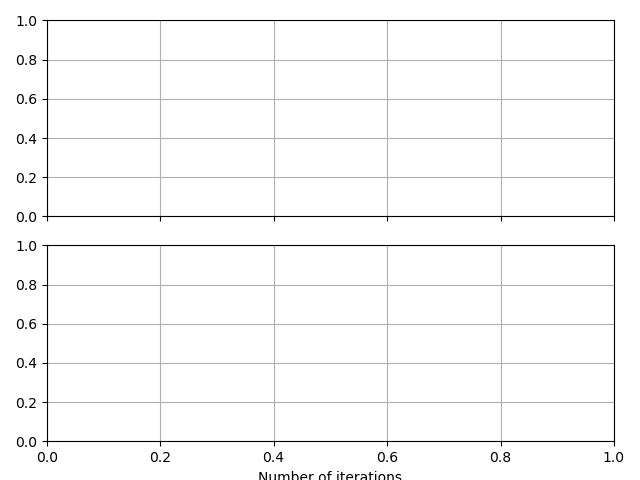

In [119]:

plotter, fig, ax = create_plot(metrics=["loss", "accuracy"])

In [120]:
def train_epoch(epoch, batch_size, label, train_images, x_test, y_test, eval_every=10):
    torch.set_grad_enabled(True)
    model.train()

    idxs = torch.randperm(len(train_images))  # shuffle indices
    for itr, batch in enumerate(
        (slice(i, i + batch_size) for i in range(0, len(train_images), batch_size))
    ):
        batch = idxs[batch]

        pred = model(train_images[batch])
        
        truth = label[batch] 
         
        loss = F.cross_entropy(pred, truth)
        
        acc = accuracy(pred, truth)

        optim.zero_grad()
        loss.backward()
        optim.step()

        if (itr + 1) % 10 == 0:
            print(f"Epoch {epoch} iteration {itr + 1}", end="\r")
            plotter.set_train_batch({ "accuracy" : acc, "loss" :loss.item()},
                                     batch_size=batch_size)
    #add in noggin plot
    with torch.autograd.no_grad():
        for batch_cnt in range(0, len(x_test)//batch_size):
            idxs = np.arange(len(x_test))
            batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
            batch = x_test[batch_indices] 
            
            prediction = model(batch)
            truth = y_test[batch_indices]
            
            acc = accuracy(prediction, truth)
            loss = F.cross_entropy(prediction, truth)
            
            plotter.set_test_batch({ "accuracy" : acc, "loss" :loss.item()},
                                     batch_size=batch_size)
            
            
    plotter.set_train_epoch()
    plotter.set_test_epoch() 

In [134]:
for epoch in range(5):
    train_epoch(epoch, batch_size, pic_label, pic_train, pic_test, pic_test_label)

RuntimeError: Expected object of scalar type Byte but got scalar type Float for argument #3 'mat1' in call to _th_addmm_